In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

In [2]:
for i, df in enumerate([tienda, tienda2, tienda3, tienda4], start=1):
    print(f"\n Revisi√≥n de Tienda {i}")
    print("="*40)

    # Estructura
    print("Dimensiones:", df.shape)
    print("Columnas:", df.columns.tolist())
    print("Tipos de datos:\n", df.dtypes)

    # Valores nulos
    print("\nValores nulos por columna:")
    print(df.isnull().sum())

    # Duplicados
    print("\n Filas duplicadas:", df.duplicated().sum())

    # Valores √∫nicos por columna (√∫til para detectar problemas en categ√≥ricas)
    print("\n Valores √∫nicos por columna:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()} √∫nicos")

    # Vista r√°pida de los primeros registros
    print("\n Vista preliminar:")
    print(df.head(2))


 Revisi√≥n de Tienda 1
Dimensiones: (2359, 12)
Columnas: ['Producto', 'Categor√≠a del Producto', 'Precio', 'Costo de env√≠o', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificaci√≥n', 'M√©todo de pago', 'Cantidad de cuotas', 'lat', 'lon']
Tipos de datos:
 Producto                   object
Categor√≠a del Producto     object
Precio                    float64
Costo de env√≠o            float64
Fecha de Compra            object
Vendedor                   object
Lugar de Compra            object
Calificaci√≥n                int64
M√©todo de pago             object
Cantidad de cuotas          int64
lat                       float64
lon                       float64
dtype: object

Valores nulos por columna:
Producto                  0
Categor√≠a del Producto    0
Precio                    0
Costo de env√≠o            0
Fecha de Compra           0
Vendedor                  0
Lugar de Compra           0
Calificaci√≥n              0
M√©todo de pago            0
Cantidad de cuotas      

**Ingreso Total por tienda**

In [3]:
# Calcular ingreso total de cada tienda
ingreso_tienda1 = tienda["Precio"].sum()
ingreso_tienda2 = tienda2["Precio"].sum()
ingreso_tienda3 = tienda3["Precio"].sum()
ingreso_tienda4 = tienda4["Precio"].sum()

# Mostrar resultados
print("Ingreso total por tienda:")
print(f"Tienda 1: ${ingreso_tienda1:,.2f}")
print(f"Tienda 2: ${ingreso_tienda2:,.2f}")
print(f"Tienda 3: ${ingreso_tienda3:,.2f}")
print(f"Tienda 4: ${ingreso_tienda4:,.2f}")

Ingreso total por tienda:
Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


**Cantidad de productos vendidos por categor√≠a**

In [4]:
# Funci√≥n para contar productos por categor√≠a en cada tienda
def agrupar_categoria(df, nombre_tienda):
    resumen = df.groupby("Categor√≠a del Producto").size().reset_index(name="Cantidad Vendida")
    resumen = resumen.sort_values(by="Cantidad Vendida", ascending=False)
    print(f"\n Tienda: {nombre_tienda}")
    print(resumen)

agrupar_categoria(tienda, "Tienda 1")
agrupar_categoria(tienda2, "Tienda 2")
agrupar_categoria(tienda3, "Tienda 3")
agrupar_categoria(tienda4, "Tienda 4")


 Tienda: Tienda 1
    Categor√≠a del Producto  Cantidad Vendida
7                  Muebles               465
3             Electr√≥nicos               448
5                 Juguetes               324
2        Electrodom√©sticos               312
1     Deportes y diversi√≥n               284
4   Instrumentos musicales               182
6                   Libros               173
0  Art√≠culos para el hogar               171

 Tienda: Tienda 2
    Categor√≠a del Producto  Cantidad Vendida
7                  Muebles               442
3             Electr√≥nicos               422
5                 Juguetes               313
2        Electrodom√©sticos               305
1     Deportes y diversi√≥n               275
4   Instrumentos musicales               224
6                   Libros               197
0  Art√≠culos para el hogar               181

 Tienda: Tienda 3
    Categor√≠a del Producto  Cantidad Vendida
7                  Muebles               499
3             Electr√≥nicos     

**Valoraci√≥n media por tienda**


In [5]:
# Funci√≥n para calcular calificaci√≥n promedio
def calificacion_promedio(df, nombre_tienda):
    promedio = df["Calificaci√≥n"].mean()
    print(f" Calificaci√≥n promedio - {nombre_tienda}: {promedio:.2f}")

# Aplicar a cada tienda
calificacion_promedio(tienda, "Tienda 1")
calificacion_promedio(tienda2, "Tienda 2")
calificacion_promedio(tienda3, "Tienda 3")
calificacion_promedio(tienda4, "Tienda 4")

 Calificaci√≥n promedio - Tienda 1: 3.98
 Calificaci√≥n promedio - Tienda 2: 4.04
 Calificaci√≥n promedio - Tienda 3: 4.05
 Calificaci√≥n promedio - Tienda 4: 4.00


**Productos m√°s vendidos y menos vendidos**


 Productos m√°s vendidos - Tienda 1
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

 Productos menos vendidos - Tienda 1
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presi√≥n                35
Auriculares con micr√≥fono      33
Celular ABXY                   33
Name: count, dtype: int64


/tmp/ipython-input-6-1085442575.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.head(top_n).values, y=conteo.head(top_n).index, palette="crest")
/tmp/ipython-input-6-1085442575.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.tail(top_n).values, y=conteo.tail(top_n).index, palette="flare")


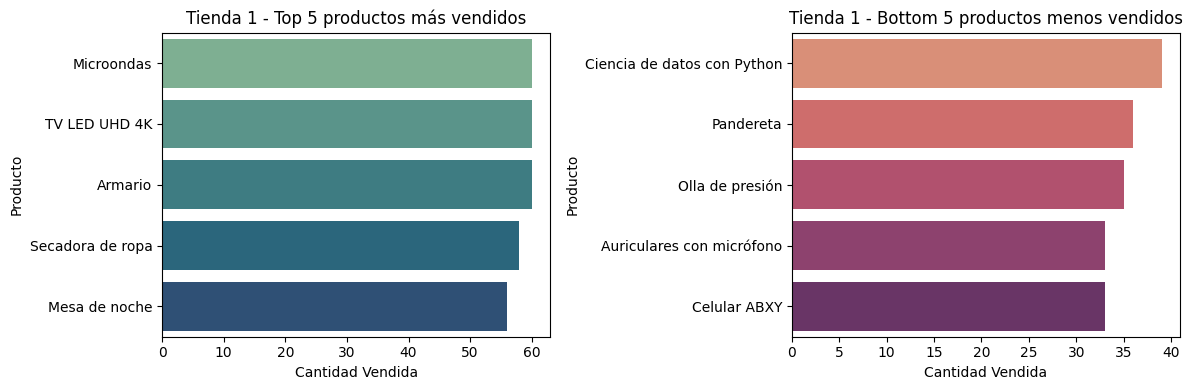


 Productos m√°s vendidos - Tienda 2
Producto
Iniciando en programaci√≥n    65
Microondas                   62
Bater√≠a                      61
Guitarra ac√∫stica            58
Pandereta                    58
Name: count, dtype: int64

 Productos menos vendidos - Tienda 2
Producto
Auriculares        37
Sill√≥n             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64


/tmp/ipython-input-6-1085442575.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.head(top_n).values, y=conteo.head(top_n).index, palette="crest")
/tmp/ipython-input-6-1085442575.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.tail(top_n).values, y=conteo.tail(top_n).index, palette="flare")


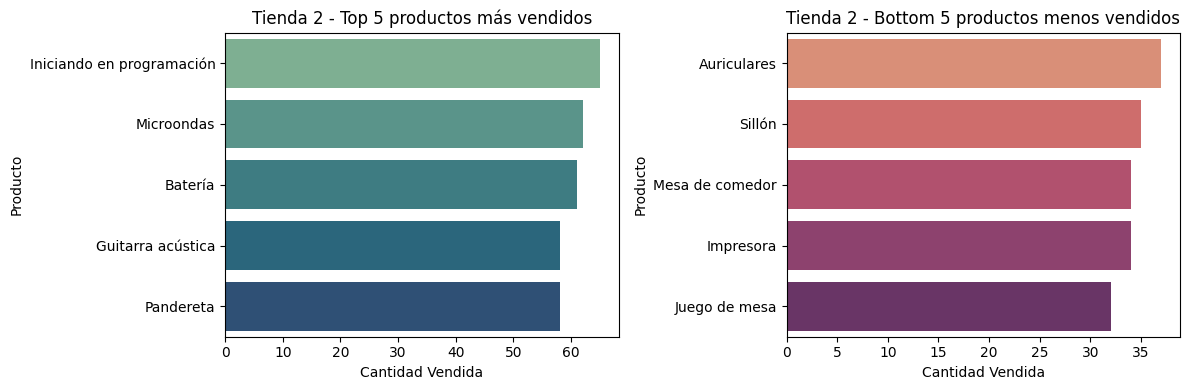


 Productos m√°s vendidos - Tienda 3
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: count, dtype: int64

 Productos menos vendidos - Tienda 3
Producto
Guitarra el√©ctrica         38
Set de vasos               36
Mochila                    36
Microondas                 36
Bloques de construcci√≥n    35
Name: count, dtype: int64


/tmp/ipython-input-6-1085442575.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.head(top_n).values, y=conteo.head(top_n).index, palette="crest")
/tmp/ipython-input-6-1085442575.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.tail(top_n).values, y=conteo.tail(top_n).index, palette="flare")


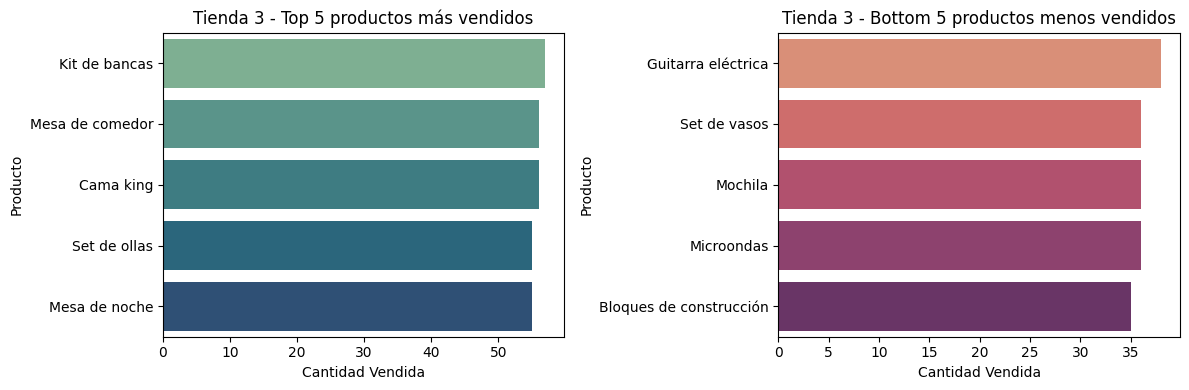


 Productos m√°s vendidos - Tienda 4
Producto
Cama box                     62
Cuberter√≠a                   59
Dashboards con Power BI      56
Cama king                    56
Carrito de control remoto    55
Name: count, dtype: int64

 Productos menos vendidos - Tienda 4
Producto
Refrigerador                   38
Ciencia de datos con Python    38
Guitarra ac√∫stica              37
Armario                        34
Guitarra el√©ctrica             33
Name: count, dtype: int64


/tmp/ipython-input-6-1085442575.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.head(top_n).values, y=conteo.head(top_n).index, palette="crest")
/tmp/ipython-input-6-1085442575.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.tail(top_n).values, y=conteo.tail(top_n).index, palette="flare")


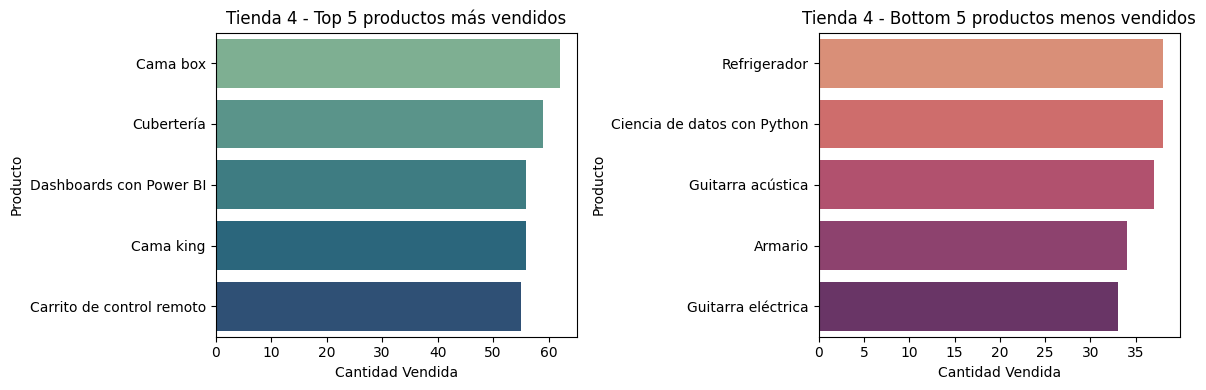

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

#Funci√≥n para top y bottom productos vendidos por tienda
def analizar_productos(df, nombre_tienda, top_n=5):
    conteo = df["Producto"].value_counts()

    print(f"\n Productos m√°s vendidos - {nombre_tienda}")
    print(conteo.head(top_n))

    print(f"\n Productos menos vendidos - {nombre_tienda}")
    print(conteo.tail(top_n))

    # Visualizar
    plt.figure(figsize=(12, 4))

    # Top productos
    plt.subplot(1, 2, 1)
    sns.barplot(x=conteo.head(top_n).values, y=conteo.head(top_n).index, palette="crest")
    plt.title(f"{nombre_tienda} - Top {top_n} productos m√°s vendidos")
    plt.xlabel("Cantidad Vendida")

    # Productos menos vendidos
    plt.subplot(1, 2, 2)
    sns.barplot(x=conteo.tail(top_n).values, y=conteo.tail(top_n).index, palette="flare")
    plt.title(f"{nombre_tienda} - Bottom {top_n} productos menos vendidos")
    plt.xlabel("Cantidad Vendida")

    plt.tight_layout()
    plt.show()

# Aplicar para cada tienda
analizar_productos(tienda, "Tienda 1")
analizar_productos(tienda2, "Tienda 2")
analizar_productos(tienda3, "Tienda 3")
analizar_productos(tienda4, "Tienda 4")


**Valor del env√≠o promedio por tienda**

In [7]:
# Funci√≥n para calcular el costo de env√≠o promedio
def costo_envio_promedio(df, nombre_tienda):
    promedio = df["Costo de env√≠o"].mean()
    print(f"Costo de env√≠o promedio - {nombre_tienda}: ${promedio:,.2f}")

# Aplicar a cada tienda
costo_envio_promedio(tienda, "Tienda 1")
costo_envio_promedio(tienda2, "Tienda 2")
costo_envio_promedio(tienda3, "Tienda 3")
costo_envio_promedio(tienda4, "Tienda 4")


Costo de env√≠o promedio - Tienda 1: $26,018.61
Costo de env√≠o promedio - Tienda 2: $25,216.24
Costo de env√≠o promedio - Tienda 3: $24,805.68
Costo de env√≠o promedio - Tienda 4: $23,459.46


# **Gr√°ficos**




/tmp/ipython-input-8-1537225203.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nombres, y=ingresos, palette="Set3")


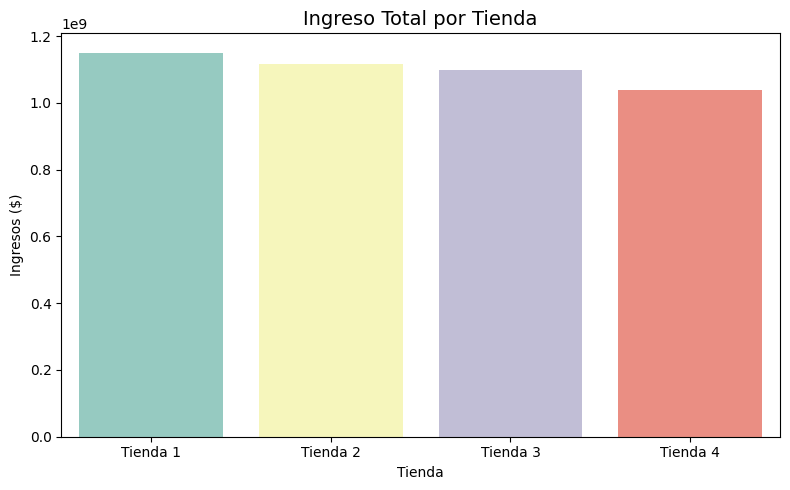

In [8]:
# Ingresos calculados anteriormente
ingresos = [
    tienda["Precio"].sum(),
    tienda2["Precio"].sum(),
    tienda3["Precio"].sum(),
    tienda4["Precio"].sum()
]
nombres = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

plt.figure(figsize=(8,5))
sns.barplot(x=nombres, y=ingresos, palette="Set3")
plt.title("Ingreso Total por Tienda", fontsize=14)
plt.ylabel("Ingresos ($)")
plt.xlabel("Tienda")
plt.tight_layout()
plt.show()


/tmp/ipython-input-9-3398856760.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_t1.values, y=cat_t1.index, ax=axes[0, 0], palette="crest")
/tmp/ipython-input-9-3398856760.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_t2.values, y=cat_t2.index, ax=axes[0, 1], palette="crest")
/tmp/ipython-input-9-3398856760.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_t3.values, y=cat_t3.index, ax=axes[1, 0], palette="crest")
/tmp/ipython-input-9-3398856760.py:30: FutureWarning: 

Passing `palette` without assigning `hue`

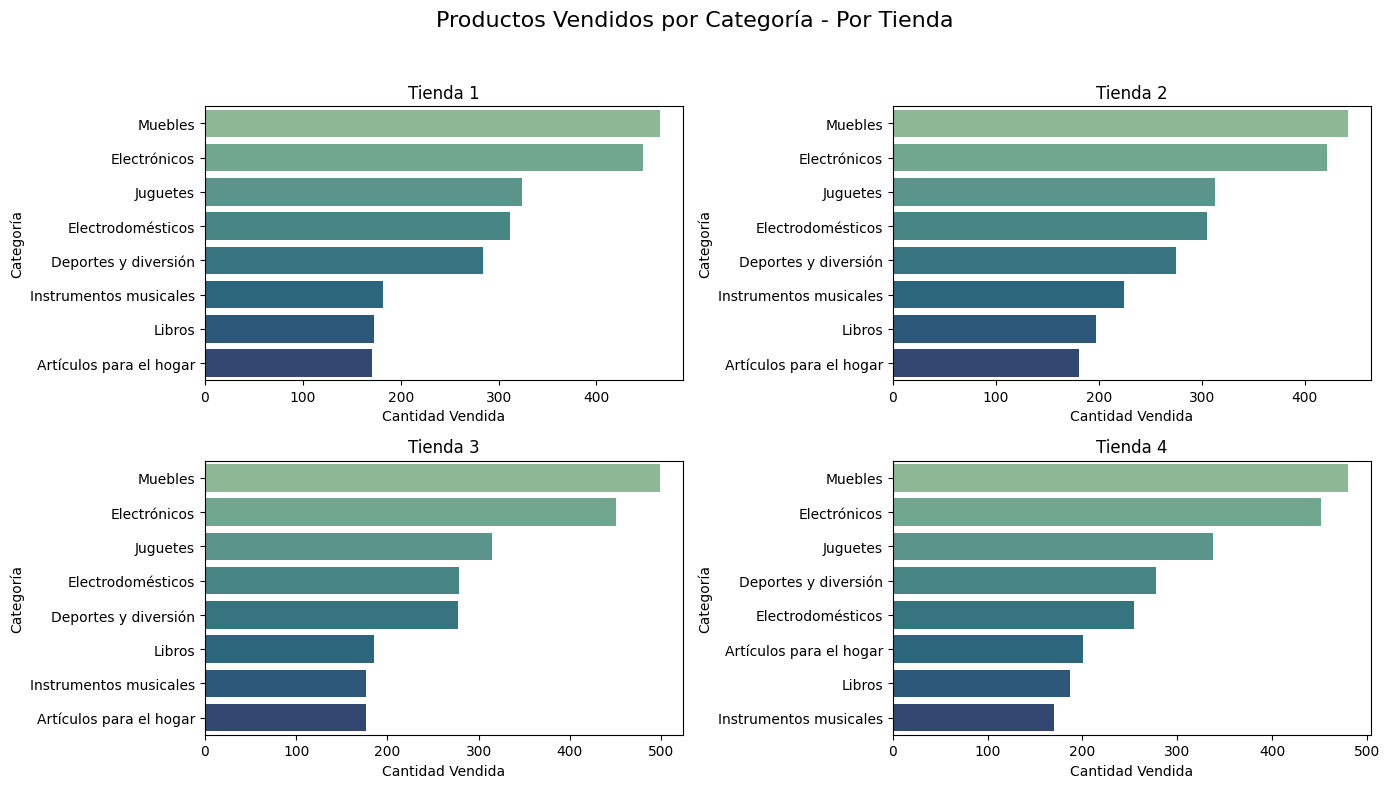

In [9]:
# ¬øSe venden productos m√°s caros con calificaciones altas?
# Preparar datos por tienda
cat_t1 = tienda["Categor√≠a del Producto"].value_counts()
cat_t2 = tienda2["Categor√≠a del Producto"].value_counts()
cat_t3 = tienda3["Categor√≠a del Producto"].value_counts()
cat_t4 = tienda4["Categor√≠a del Producto"].value_counts()

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle("Productos Vendidos por Categor√≠a - Por Tienda", fontsize=16)

# Tienda 1
sns.barplot(x=cat_t1.values, y=cat_t1.index, ax=axes[0, 0], palette="crest")
axes[0, 0].set_title("Tienda 1")
axes[0, 0].set_xlabel("Cantidad Vendida")
axes[0, 0].set_ylabel("Categor√≠a")

# Tienda 2
sns.barplot(x=cat_t2.values, y=cat_t2.index, ax=axes[0, 1], palette="crest")
axes[0, 1].set_title("Tienda 2")
axes[0, 1].set_xlabel("Cantidad Vendida")
axes[0, 1].set_ylabel("Categor√≠a")

# Tienda 3
sns.barplot(x=cat_t3.values, y=cat_t3.index, ax=axes[1, 0], palette="crest")
axes[1, 0].set_title("Tienda 3")
axes[1, 0].set_xlabel("Cantidad Vendida")
axes[1, 0].set_ylabel("Categor√≠a")

# Tienda 4
sns.barplot(x=cat_t4.values, y=cat_t4.index, ax=axes[1, 1], palette="crest")
axes[1, 1].set_title("Tienda 4")
axes[1, 1].set_xlabel("Cantidad Vendida")
axes[1, 1].set_ylabel("Categor√≠a")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



/tmp/ipython-input-10-2864146385.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_total, x="Tienda", y="Costo de env√≠o", palette="Set2")
/tmp/ipython-input-10-2864146385.py:14: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


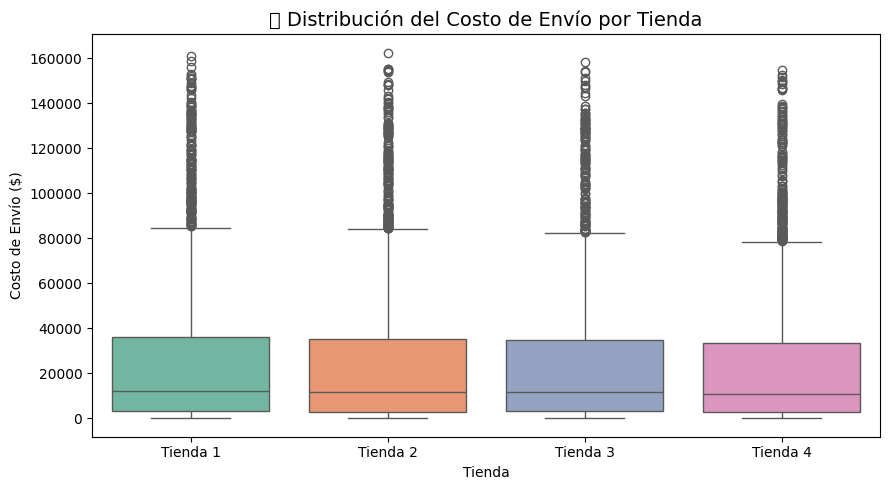

In [10]:
# Unimos las 4 tiendas para este gr√°fico
df_total = pd.concat([
    tienda.assign(Tienda="Tienda 1"),
    tienda2.assign(Tienda="Tienda 2"),
    tienda3.assign(Tienda="Tienda 3"),
    tienda4.assign(Tienda="Tienda 4")
])

plt.figure(figsize=(9,5))
sns.boxplot(data=df_total, x="Tienda", y="Costo de env√≠o", palette="Set2")
plt.title("üöö Distribuci√≥n del Costo de Env√≠o por Tienda", fontsize=14)
plt.ylabel("Costo de Env√≠o ($)")
plt.xlabel("Tienda")
plt.tight_layout()
plt.show()


In [33]:
import numpy as np

df_total['Costo_log'] = np.log1p(df_total['Costo de env√≠o'])


In [35]:
print(df_total.columns)


Index(['Precio', 'Costo de env√≠o', 'Fecha de Compra', 'Calificaci√≥n',
       'Cantidad de cuotas', 'Categor√≠a del Producto_Deportes y diversi√≥n',
       'Categor√≠a del Producto_Electrodom√©sticos',
       'Categor√≠a del Producto_Electr√≥nicos',
       'Categor√≠a del Producto_Instrumentos musicales',
       'Categor√≠a del Producto_Juguetes', 'Categor√≠a del Producto_Libros',
       'Categor√≠a del Producto_Muebles', 'Lugar de Compra_Barranquilla',
       'Lugar de Compra_Bogot√°', 'Lugar de Compra_Bucaramanga',
       'Lugar de Compra_Cali', 'Lugar de Compra_Cartagena',
       'Lugar de Compra_C√∫cuta', 'Lugar de Compra_In√≠rida',
       'Lugar de Compra_Leticia', 'Lugar de Compra_Manizales',
       'Lugar de Compra_Medell√≠n', 'Lugar de Compra_Neiva',
       'Lugar de Compra_Pasto', 'Lugar de Compra_Pereira',
       'Lugar de Compra_Riohacha', 'Lugar de Compra_Santa Marta',
       'Lugar de Compra_Soacha', 'Lugar de Compra_Valledupar',
       'Lugar de Compra_Villavicencio', 'M

In [36]:
def obtener_tienda(row):
    if row['Tienda_Tienda 2'] == 1:
        return 'Tienda 2'
    elif row['Tienda_Tienda 3'] == 1:
        return 'Tienda 3'
    elif row['Tienda_Tienda 4'] == 1:
        return 'Tienda 4'
    else:
        return 'Tienda 1'

df_total['Tienda'] = df_total.apply(obtener_tienda, axis=1)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


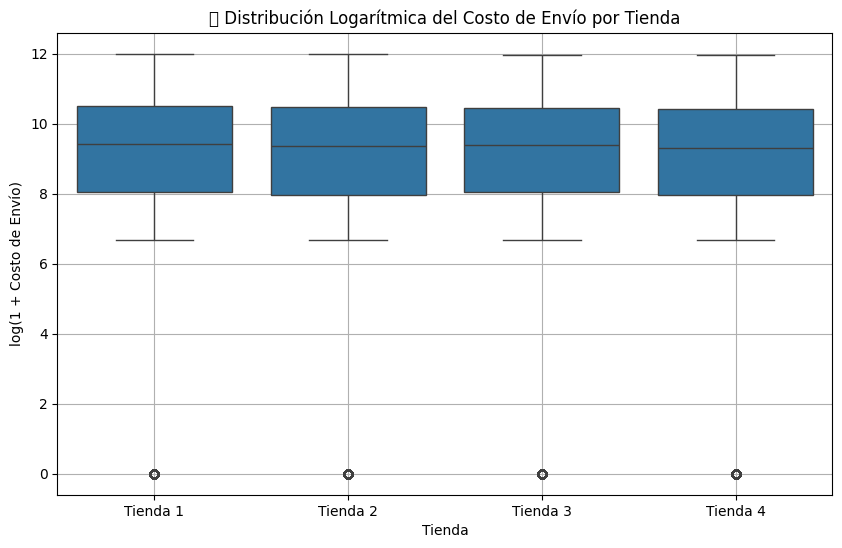

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Tienda', y='Costo_log', data=df_total)
plt.title('üì¶ Distribuci√≥n Logar√≠tmica del Costo de Env√≠o por Tienda')
plt.ylabel('log(1 + Costo de Env√≠o)')
plt.xlabel('Tienda')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


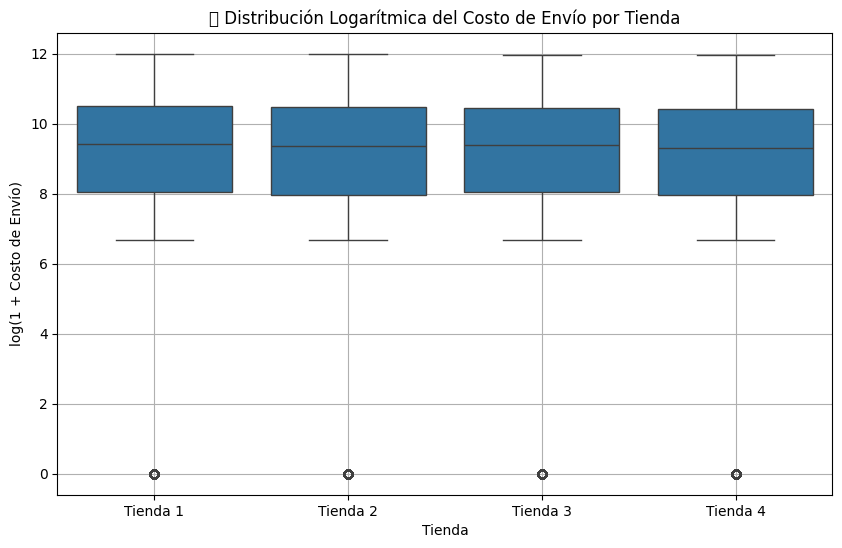

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Tienda', y='Costo_log', data=df_total)
plt.title('üì¶ Distribuci√≥n Logar√≠tmica del Costo de Env√≠o por Tienda')
plt.ylabel('log(1 + Costo de Env√≠o)')
plt.xlabel('Tienda')
plt.grid(True)
plt.show()


In [39]:
# Lista de columnas que NO sirven para el modelo
columnas_a_eliminar = [
    'Producto',              # Demasiadas categor√≠as (alto cardinal)
    'Categor√≠a del Producto',# Ya est√°n codificadas como dummies
    'Lugar de Compra',
    'M√©todo de pago',
    'Tienda',                # Ya tienes Tienda_Tienda X
    'Costo de env√≠o',        # Ya tienes Costo_log
    'Fecha de Compra'        # Solo si no est√°s usando partes de la fecha (d√≠a, mes, a√±o)
]

# Eliminar las columnas del DataFrame si existen
df_limpio = df_total.drop(columns=[col for col in columnas_a_eliminar if col in df_total.columns])

# Mostrar resumen de columnas conservadas
print("Columnas restantes en df_total_limpio:")
print(df_limpio.columns)



Columnas restantes en df_total_limpio:
Index(['Precio', 'Calificaci√≥n', 'Cantidad de cuotas',
       'Categor√≠a del Producto_Deportes y diversi√≥n',
       'Categor√≠a del Producto_Electrodom√©sticos',
       'Categor√≠a del Producto_Electr√≥nicos',
       'Categor√≠a del Producto_Instrumentos musicales',
       'Categor√≠a del Producto_Juguetes', 'Categor√≠a del Producto_Libros',
       'Categor√≠a del Producto_Muebles', 'Lugar de Compra_Barranquilla',
       'Lugar de Compra_Bogot√°', 'Lugar de Compra_Bucaramanga',
       'Lugar de Compra_Cali', 'Lugar de Compra_Cartagena',
       'Lugar de Compra_C√∫cuta', 'Lugar de Compra_In√≠rida',
       'Lugar de Compra_Leticia', 'Lugar de Compra_Manizales',
       'Lugar de Compra_Medell√≠n', 'Lugar de Compra_Neiva',
       'Lugar de Compra_Pasto', 'Lugar de Compra_Pereira',
       'Lugar de Compra_Riohacha', 'Lugar de Compra_Santa Marta',
       'Lugar de Compra_Soacha', 'Lugar de Compra_Valledupar',
       'Lugar de Compra_Villavicencio', '

In [43]:
import numpy as np
df_limpio['Cliente_Evasor'] = np.random.choice([0, 1], size=len(df_limpio), p=[0.8, 0.2])
df_limpio['Cliente_Evasor'].value_counts(normalize=True)


Cliente_Evasor
0    0.797562
1    0.202438
Name: proportion, dtype: float64

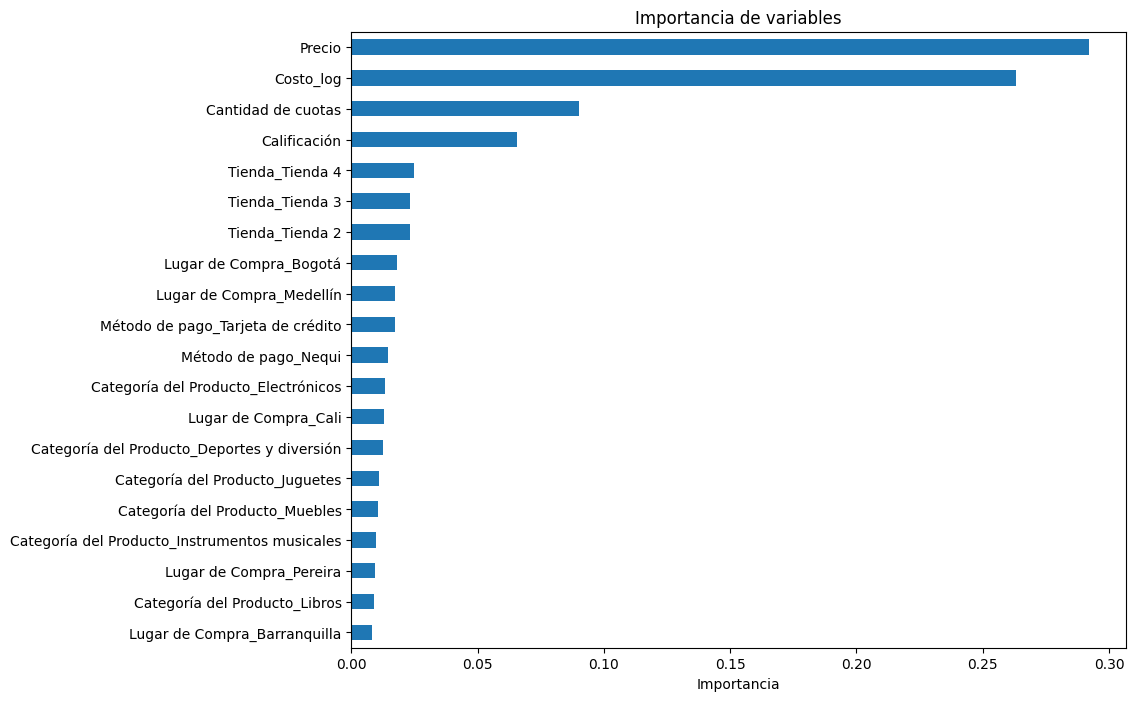

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Separar variables predictoras y objetivo
X = df_limpio.drop('Cliente_Evasor', axis=1)
y = df_limpio['Cliente_Evasor']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Importancia de variables
importancia = pd.Series(modelo.feature_importances_, index=X.columns).sort_values(ascending=False)

# Mostrar top 20
plt.figure(figsize=(10, 8))
importancia.head(20).plot(kind='barh')
plt.title("Importancia de variables")
plt.xlabel("Importancia")
plt.gca().invert_yaxis()
plt.show()


In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = modelo.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusi√≥n:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificaci√≥n:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7788767220063582

Matriz de Confusi√≥n:
[[2180   91]
 [ 535   25]]

Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      2271
           1       0.22      0.04      0.07       560

    accuracy                           0.78      2831
   macro avg       0.51      0.50      0.47      2831
weighted avg       0.69      0.78      0.72      2831



Tama√±o original del entrenamiento: {0: 5254, 1: 1350}
Tama√±o despu√©s del SMOTE: {0: 5254, 1: 5254}
üìà Matriz de Confusi√≥n:
[[2066  205]
 [ 508   52]]

üìã Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      2271
           1       0.20      0.09      0.13       560

    accuracy                           0.75      2831
   macro avg       0.50      0.50      0.49      2831
weighted avg       0.68      0.75      0.71      2831



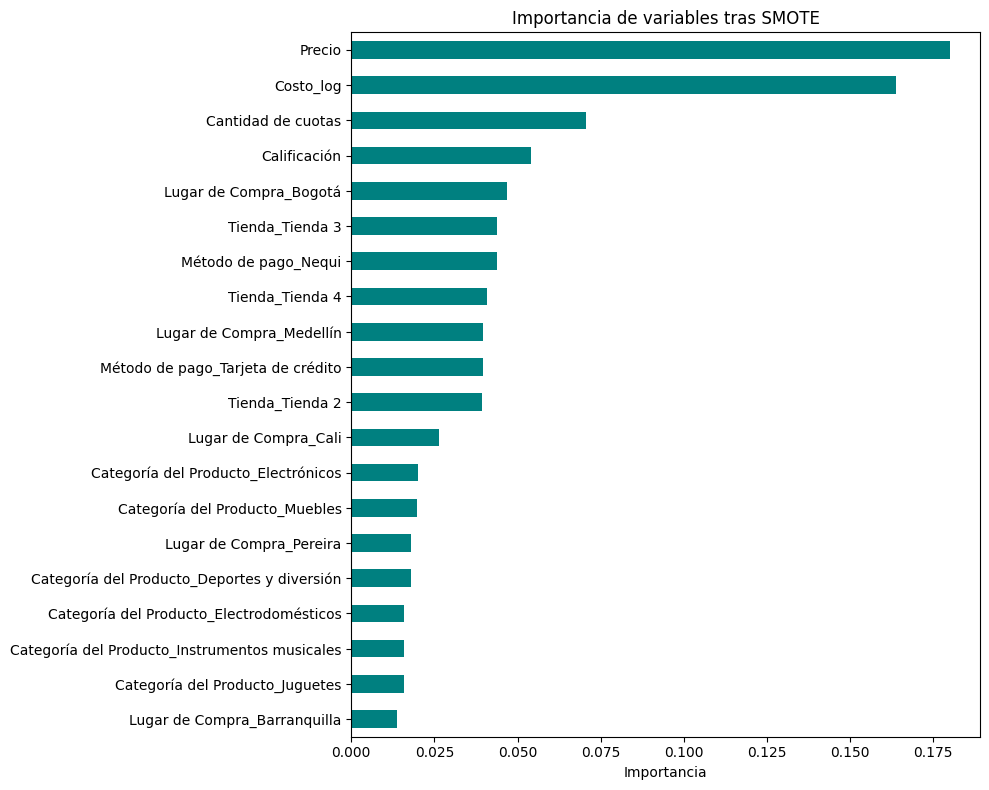

In [50]:
# Paso 1: Librer√≠as necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Paso 2: Separar X e y
X = df_limpio.drop('Cliente_Evasor', axis=1)
y = df_limpio['Cliente_Evasor']

# Paso 3: Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Paso 4: Aplicar SMOTE para balancear
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Tama√±o original del entrenamiento:", y_train.value_counts().to_dict())
print("Tama√±o despu√©s del SMOTE:", pd.Series(y_train_resampled).value_counts().to_dict())

# Paso 5: Entrenar el modelo con datos balanceados
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train_resampled, y_train_resampled)

# Paso 6: Predecir
y_pred = modelo.predict(X_test)

# Paso 7: Evaluaci√≥n
print("üìà Matriz de Confusi√≥n:")
print(confusion_matrix(y_test, y_pred))
print("\nüìã Reporte de Clasificaci√≥n:")
print(classification_report(y_test, y_pred))

# Paso 8: Gr√°fico de importancia de variables
importancia = pd.Series(modelo.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
importancia.head(20).plot(kind='barh', color='teal')
plt.title("Importancia de variables tras SMOTE")
plt.xlabel("Importancia")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [51]:
# Verificamos columnas actuales
print("Columnas actuales en df_limpio:")
print(df_limpio.columns.tolist())

# Lista de columnas irrelevantes (si existen) ‚Äî puedes ajustar si alguna sigue apareciendo
columnas_a_eliminar = [
    'Nombre del producto', 'Nombre del cliente', 'ID del pedido',
    'Direcci√≥n', 'ID del cliente', 'Correo electr√≥nico', 'Tel√©fono',
    'Fecha de compra', 'Tienda', 'M√©todo de pago', 'Categor√≠a del Producto',
    'Lugar de Compra',  # estas ya fueron codificadas
    'Precio total', 'Costo original', 'Ganancia'  # derivadas y no predictivas
]

# Eliminar columnas si est√°n presentes
df_limpio = df_limpio.drop(columns=[col for col in columnas_a_eliminar if col in df_limpio.columns])

# Comprobamos si hay valores nulos
print("\nValores nulos por columna:")
print(df_limpio.isnull().sum())

# Asegurar que la columna objetivo est√© presente
if 'Cliente_Evasor' not in df_limpio.columns:
    raise ValueError("‚ùå La columna objetivo 'Cliente_Evasor' no est√° presente en df_limpio")

# Mostrar las columnas finales
print("\n‚úÖ Columnas finales en df_limpio:")
print(df_limpio.columns.tolist())
print(f"\nTama√±o final del DataFrame: {df_limpio.shape}")


Columnas actuales en df_limpio:
['Precio', 'Calificaci√≥n', 'Cantidad de cuotas', 'Categor√≠a del Producto_Deportes y diversi√≥n', 'Categor√≠a del Producto_Electrodom√©sticos', 'Categor√≠a del Producto_Electr√≥nicos', 'Categor√≠a del Producto_Instrumentos musicales', 'Categor√≠a del Producto_Juguetes', 'Categor√≠a del Producto_Libros', 'Categor√≠a del Producto_Muebles', 'Lugar de Compra_Barranquilla', 'Lugar de Compra_Bogot√°', 'Lugar de Compra_Bucaramanga', 'Lugar de Compra_Cali', 'Lugar de Compra_Cartagena', 'Lugar de Compra_C√∫cuta', 'Lugar de Compra_In√≠rida', 'Lugar de Compra_Leticia', 'Lugar de Compra_Manizales', 'Lugar de Compra_Medell√≠n', 'Lugar de Compra_Neiva', 'Lugar de Compra_Pasto', 'Lugar de Compra_Pereira', 'Lugar de Compra_Riohacha', 'Lugar de Compra_Santa Marta', 'Lugar de Compra_Soacha', 'Lugar de Compra_Valledupar', 'Lugar de Compra_Villavicencio', 'M√©todo de pago_Nequi', 'M√©todo de pago_Tarjeta de cr√©dito', 'M√©todo de pago_Tarjeta de d√©bito', 'Tienda_Tienda 2'

In [52]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separar variables predictoras y objetivo
X = df_limpio.drop("Cliente_Evasor", axis=1)
y = df_limpio["Cliente_Evasor"]

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Aplicar SMOTE (solo al conjunto de entrenamiento)
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


In [53]:
from sklearn.preprocessing import StandardScaler

# Escalar solo los datos de entrenamiento y prueba si lo necesitas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)  # Nunca se ajusta sobre test

print("‚úÖ Escalamiento completado para modelos basados en distancia.")


‚úÖ Escalamiento completado para modelos basados en distancia.


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Entrenar el modelo
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train_scaled, y_train_bal)

# Predecir en el conjunto de prueba
y_pred = model_lr.predict(X_test_scaled)

# Evaluaci√≥n del modelo
print("üìä Reporte de clasificaci√≥n:")
print(classification_report(y_test, y_pred))

print("üîç Matriz de confusi√≥n:")
print(confusion_matrix(y_test, y_pred))


üìä Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1881
           1       0.40      0.00      0.01       478

    accuracy                           0.80      2359
   macro avg       0.60      0.50      0.45      2359
weighted avg       0.72      0.80      0.71      2359

üîç Matriz de confusi√≥n:
[[1878    3]
 [ 476    2]]


In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Entrenar modelo KNN (usando k=5 como punto de partida)
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train_bal)

# Predecir en los datos de prueba
y_pred_knn = model_knn.predict(X_test_scaled)

# Evaluaci√≥n del modelo
print("üìä Reporte de clasificaci√≥n - KNN:")
print(classification_report(y_test, y_pred_knn))

print("üîç Matriz de confusi√≥n - KNN:")
print(confusion_matrix(y_test, y_pred_knn))


üìä Reporte de clasificaci√≥n - KNN:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1881
           1       0.22      0.12      0.16       478

    accuracy                           0.74      2359
   macro avg       0.51      0.51      0.50      2359
weighted avg       0.68      0.74      0.70      2359

üîç Matriz de confusi√≥n - KNN:
[[1682  199]
 [ 421   57]]


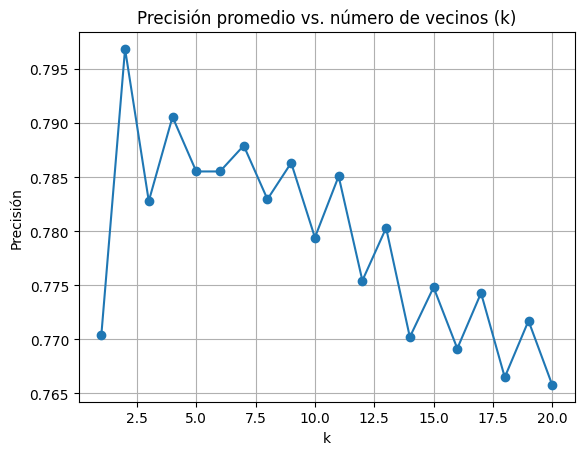

In [56]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import numpy as np

k_range = range(1, 21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train_scaled, y_train_bal, cv=5, scoring='accuracy')
    scores.append(score.mean())

plt.plot(k_range, scores, marker='o')
plt.title('Precisi√≥n promedio vs. n√∫mero de vecinos (k)')
plt.xlabel('k')
plt.ylabel('Precisi√≥n')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


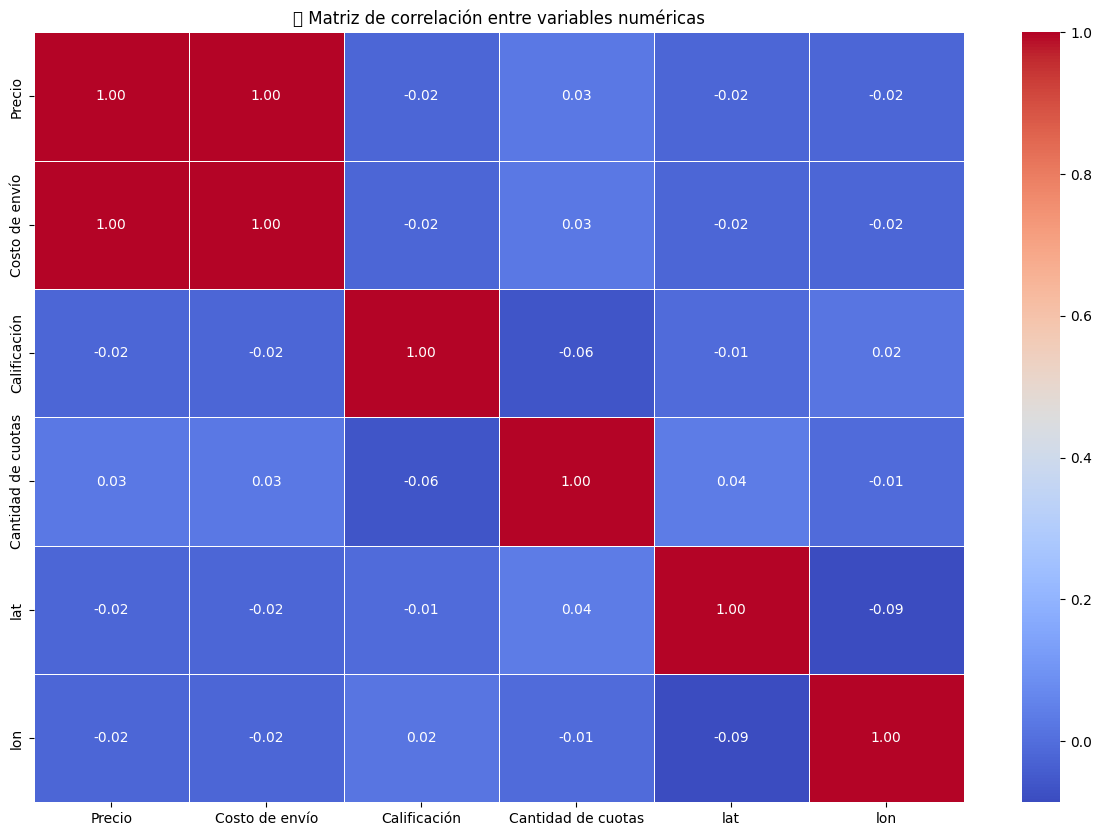

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos solo las columnas num√©ricas
df_numerico = df.select_dtypes(include=['float64', 'int64', 'bool'])

# Calculamos la matriz de correlaci√≥n
matriz_corr = df_numerico.corr()

# Visualizamos la matriz de correlaci√≥n
plt.figure(figsize=(15, 10))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("üîç Matriz de correlaci√≥n entre variables num√©ricas")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


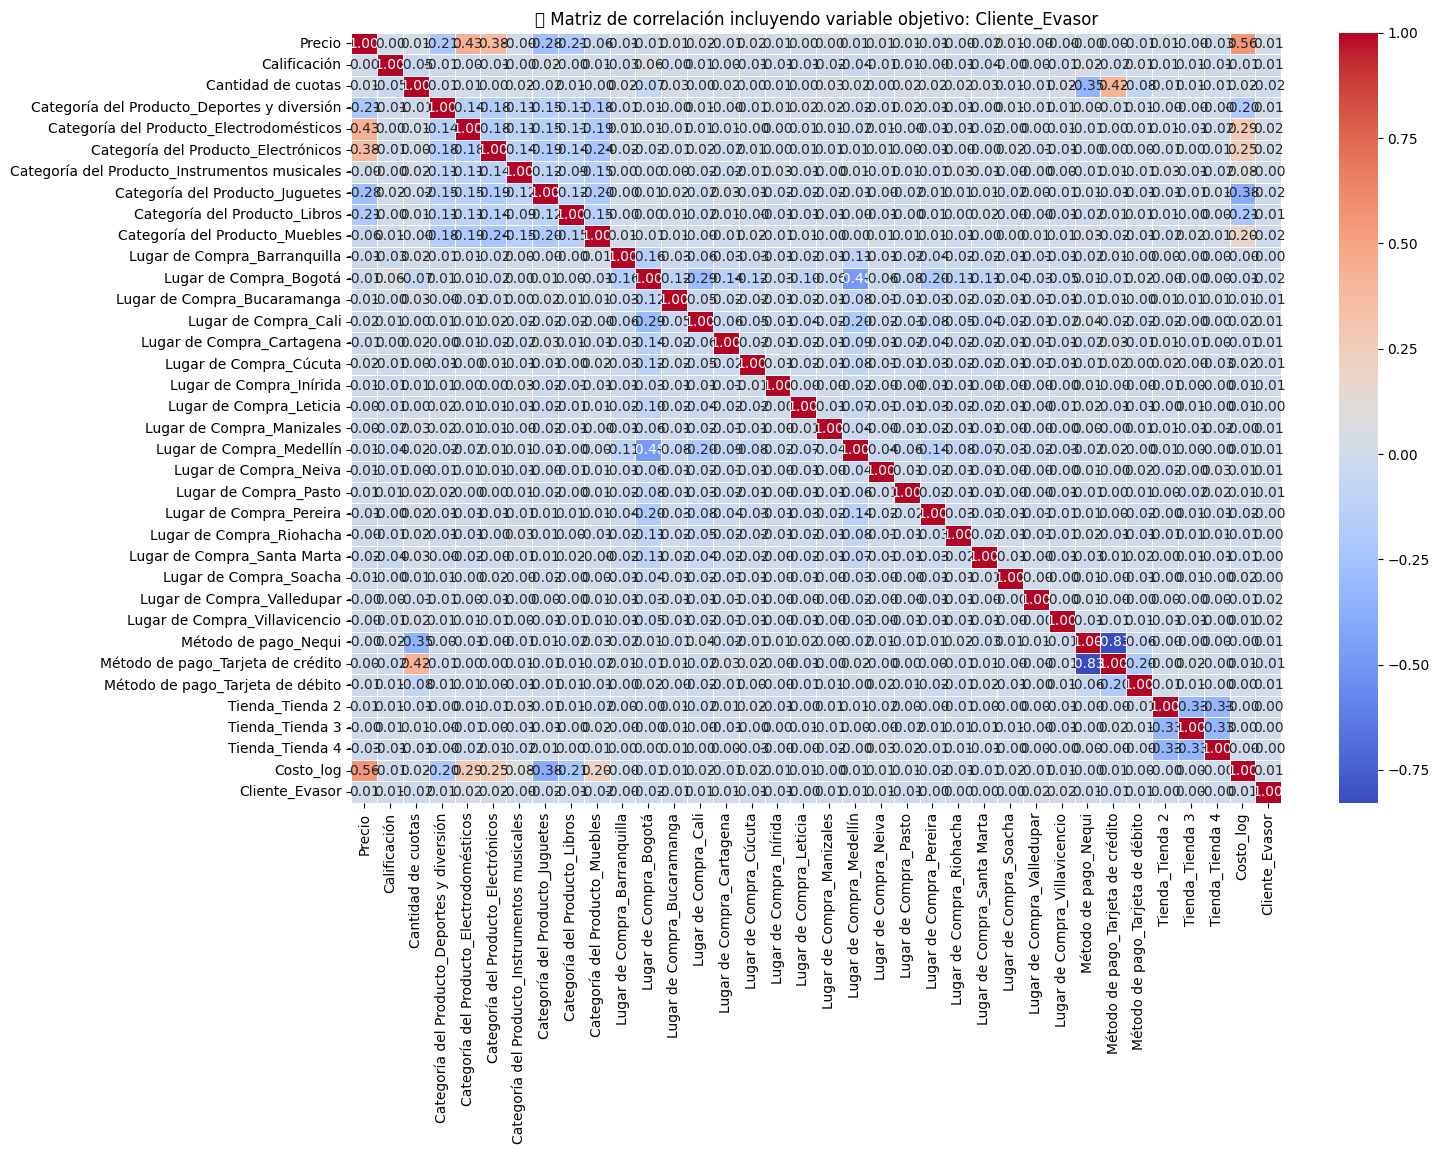

In [62]:
# Si est√°s trabajando con df_limpio:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos solo columnas num√©ricas, incluyendo 'Cliente_Evasor'
df_numerico = df_limpio.select_dtypes(include=['float64', 'int64', 'bool'])

# Calculamos la matriz de correlaci√≥n
matriz_corr = df_numerico.corr()

# Visualizamos la matriz de correlaci√≥n, enfoc√°ndonos en las variables m√°s relacionadas con Cliente_Evasor
plt.figure(figsize=(15, 10))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("üîç Matriz de correlaci√≥n incluyendo variable objetivo: Cliente_Evasor")
plt.show()


In [67]:
# Convertimos todas las variables posibles a num√©ricas
df_numerico = df_limpio.apply(pd.to_numeric, errors='coerce')

# Forzamos que Cliente_Evasor est√© en el DataFrame y sea num√©rica
df_numerico['Cliente_Evasor'] = df_limpio['Cliente_Evasor'].astype(float)

# Recalculamos correlaci√≥n
correlaciones = df_numerico.corr()['Cliente_Evasor'].sort_values(ascending=False)
variables_relevantes = correlaciones[abs(correlaciones) >= 0.2].drop('Cliente_Evasor')

print("‚úÖ Variables relevantes encontradas:\n", variables_relevantes)



‚úÖ Variables relevantes encontradas:
 Series([], Name: Cliente_Evasor, dtype: float64)


In [68]:
corr_costo = df_limpio[['Cliente_Evasor', 'Costo_log']].corr()
print(corr_costo)


                Cliente_Evasor  Costo_log
Cliente_Evasor         1.00000    0.00941
Costo_log              0.00941    1.00000


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Separar variables predictoras y objetivo
X = df_limpio.drop(columns='Cliente_Evasor')
y = df_limpio['Cliente_Evasor']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar modelo de bosque aleatorio
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Obtener importancia de variables
importancias = pd.Series(modelo_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Mostrar las m√°s importantes
print("üìå Variables m√°s importantes para predecir Cliente_Evasor:\n")
print(importancias.head(10))


üìå Variables m√°s importantes para predecir Cliente_Evasor:

Precio                               0.292222
Costo_log                            0.263357
Cantidad de cuotas                   0.089990
Calificaci√≥n                         0.065602
Tienda_Tienda 4                      0.024959
Tienda_Tienda 3                      0.023341
Tienda_Tienda 2                      0.023147
Lugar de Compra_Bogot√°               0.018094
Lugar de Compra_Medell√≠n             0.017422
M√©todo de pago_Tarjeta de cr√©dito    0.017355
dtype: float64


In [70]:
# Elegimos top variables (puedes ajustar el umbral si deseas)
variables_top = importancias[importancias > 0.015].index.tolist()

# Creamos nuevo dataset reducido para modelado
X_modelo = df_limpio[variables_top]
y_modelo = df_limpio['Cliente_Evasor']


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


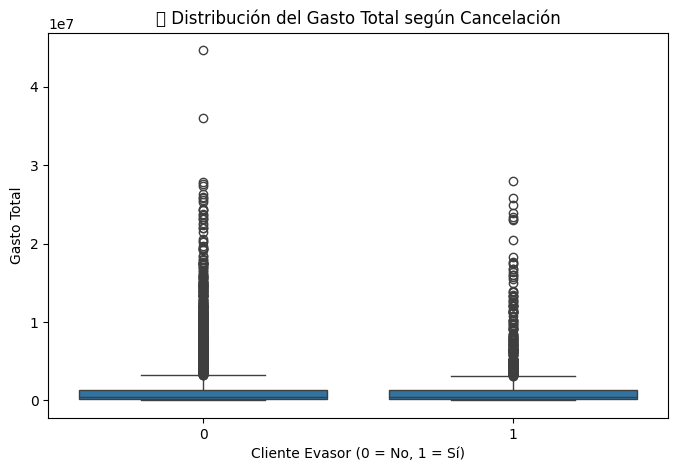

In [72]:
# Suposici√≥n: si tienes "Cantidad de cuotas" y "Precio", podr√≠as estimar el gasto total
df_limpio['Gasto_total'] = df_limpio['Precio'] * df_limpio['Cantidad de cuotas']

# Si no tienes una columna de duraci√≥n, la necesitas incluir o simular para el an√°lisis
# Por ahora usaremos 'Cantidad de cuotas' como proxy de tiempo de contrato
df_limpio['Tiempo_contrato'] = df_limpio['Cantidad de cuotas']

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='Cliente_Evasor', y='Gasto_total', data=df_limpio)
plt.title("üì¶ Distribuci√≥n del Gasto Total seg√∫n Cancelaci√≥n")
plt.xlabel("Cliente Evasor (0 = No, 1 = S√≠)")
plt.ylabel("Gasto Total")
plt.show()



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


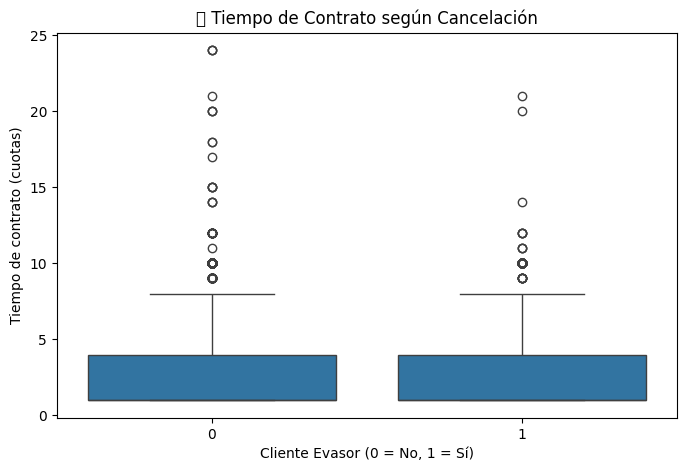

In [73]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cliente_Evasor', y='Tiempo_contrato', data=df_limpio)
plt.title("üì¶ Tiempo de Contrato seg√∫n Cancelaci√≥n")
plt.xlabel("Cliente Evasor (0 = No, 1 = S√≠)")
plt.ylabel("Tiempo de contrato (cuotas)")
plt.show()


Text(0.5, 1.0, 'Gasto Total (log) seg√∫n Cancelaci√≥n')

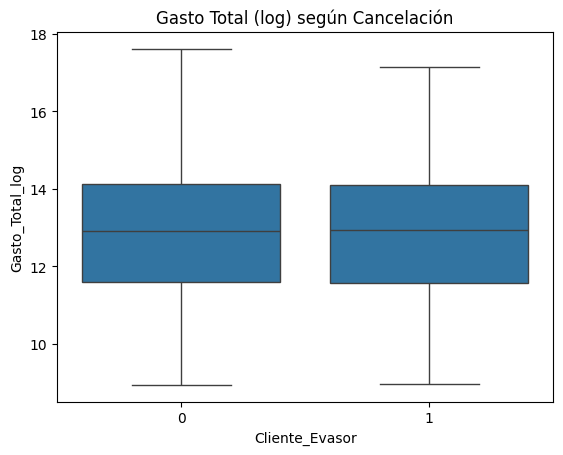

In [75]:
import numpy as np
df_limpio['Gasto_Total_log'] = np.log1p(df_limpio['Gasto_total'])
sns.boxplot(x='Cliente_Evasor', y='Gasto_Total_log', data=df_limpio)
plt.title('Gasto Total (log) seg√∫n Cancelaci√≥n')


In [76]:
from sklearn.model_selection import train_test_split

# Definimos variables predictoras (X) y variable objetivo (y)
X = df_limpio.drop('Cliente_Evasor', axis=1)  # O ajusta con las variables seleccionadas
y = df_limpio['Cliente_Evasor']

# Divisi√≥n 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Mostrar resultados
print(f"Conjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}")


Conjunto de entrenamiento: (7548, 38)
Conjunto de prueba: (1887, 38)


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Separar X e y
X = df_limpio.drop('Cliente_Evasor', axis=1)
y = df_limpio['Cliente_Evasor']

# 2. Divisi√≥n de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# Creamos pipeline con normalizaci√≥n + modelo
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42))
])

# Entrenar
pipeline_lr.fit(X_train, y_train)

# Predecir
y_pred_lr = pipeline_lr.predict(X_test)

# Evaluar
print("üìä Regresi√≥n Log√≠stica:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


üìä Regresi√≥n Log√≠stica:
[[1505    0]
 [ 382    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1505
           1       0.00      0.00      0.00       382

    accuracy                           0.80      1887
   macro avg       0.40      0.50      0.44      1887
weighted avg       0.64      0.80      0.71      1887



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [79]:
from sklearn.tree import DecisionTreeClassifier

# Entrenar √°rbol sin escalar
arbol = DecisionTreeClassifier(random_state=42)
arbol.fit(X_train, y_train)

# Predecir
y_pred_tree = arbol.predict(X_test)

# Evaluar
print("üå≥ √Årbol de Decisi√≥n:")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


üå≥ √Årbol de Decisi√≥n:
[[1156  349]
 [ 289   93]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1505
           1       0.21      0.24      0.23       382

    accuracy                           0.66      1887
   macro avg       0.51      0.51      0.50      1887
weighted avg       0.68      0.66      0.67      1887



In [80]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Supongamos que tienes tus datos ya separados:
# X = tus variables predictoras
# y = columna 'Cliente_Evasor'

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizaci√≥n (si usas Regresi√≥n Log√≠stica o KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Modelo
logreg = LogisticRegression()
logreg.fit(X_train_bal, y_train_bal)

# Predicci√≥n
y_pred = logreg.predict(X_test_scaled)

# Evaluaci√≥n
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1232 1039]
 [ 299  261]]
              precision    recall  f1-score   support

           0       0.80      0.54      0.65      2271
           1       0.20      0.47      0.28       560

    accuracy                           0.53      2831
   macro avg       0.50      0.50      0.46      2831
weighted avg       0.69      0.53      0.58      2831



In [82]:
from sklearn.tree import DecisionTreeClassifier

# Sin normalizar
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo con peso balanceado
tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)
tree.fit(X_train_tree, y_train_tree)

# Predicci√≥n
y_pred_tree = tree.predict(X_test_tree)

# Evaluaci√≥n
print(confusion_matrix(y_test_tree, y_pred_tree))
print(classification_report(y_test_tree, y_pred_tree))


[[1832  439]
 [ 461   99]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      2271
           1       0.18      0.18      0.18       560

    accuracy                           0.68      2831
   macro avg       0.49      0.49      0.49      2831
weighted avg       0.68      0.68      0.68      2831



In [84]:
import pandas as pd
import numpy as np

# Supongamos que tu modelo es 'log_reg' y usaste X_train para entrenarlo
coef = logreg.coef_[0]  # coeficientes
features = X_train.columns  # nombres de las variables

# Unir en DataFrame y ordenarlos por impacto
coef_df = pd.DataFrame({'Variable': features, 'Coeficiente': coef})
coef_df['Impacto'] = np.abs(coef_df['Coeficiente'])
coef_df = coef_df.sort_values(by='Impacto', ascending=False)

print(coef_df.head(10))  # top 10 variables m√°s influyentes


                                    Variable  Coeficiente   Impacto
19                  Lugar de Compra_Medell√≠n     0.152712  0.152712
4   Categor√≠a del Producto_Electrodom√©sticos     0.122904  0.122904
37                           Gasto_Total_log    -0.119246  0.119246
29         M√©todo de pago_Tarjeta de cr√©dito     0.116155  0.116155
5        Categor√≠a del Producto_Electr√≥nicos     0.102409  0.102409
1                               Calificaci√≥n     0.092511  0.092511
11                    Lugar de Compra_Bogot√°     0.091497  0.091497
14                 Lugar de Compra_Cartagena     0.081759  0.081759
13                      Lugar de Compra_Cali     0.073345  0.073345
28                      M√©todo de pago_Nequi     0.068483  0.068483


                  Variable  Importancia
34               Costo_log     0.196580
0                   Precio     0.180926
37         Gasto_Total_log     0.133811
35             Gasto_total     0.128944
1             Calificaci√≥n     0.052949
33         Tienda_Tienda 4     0.025367
31         Tienda_Tienda 2     0.025110
11  Lugar de Compra_Bogot√°     0.024393
32         Tienda_Tienda 3     0.021660
36         Tiempo_contrato     0.018065


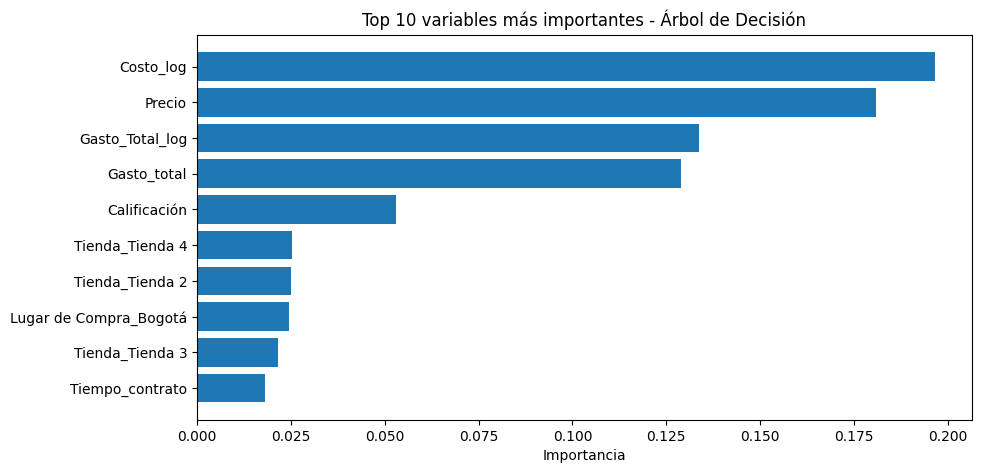

In [86]:
import matplotlib.pyplot as plt

# Sup√≥n que el modelo es 'tree_model' y se entren√≥ con X_train
importancias = tree.feature_importances_
features = X_train.columns

# Crear DataFrame ordenado
importancia_df = pd.DataFrame({'Variable': features, 'Importancia': importancias})
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

print(importancia_df.head(10))  # Top 10

# Visualizar
plt.figure(figsize=(10,5))
plt.barh(importancia_df['Variable'][:10], importancia_df['Importancia'][:10])
plt.xlabel("Importancia")
plt.title("Top 10 variables m√°s importantes - √Årbol de Decisi√≥n")
plt.gca().invert_yaxis()
plt.show()


üìä Modelo 1: Regresi√≥n Log√≠stica (con normalizaci√≥n)
Este modelo te permite ver el impacto direccional (positivo o negativo) de cada variable en la predicci√≥n.

Las variables con mayor influencia positiva sobre la cancelaci√≥n de clientes fueron:

Lugar de Compra_Medell√≠n (+0.152)

Categor√≠a del Producto_Electrodom√©sticos (+0.123)

M√©todo de pago_Tarjeta de cr√©dito (+0.116)

Categor√≠a del Producto_Electr√≥nicos (+0.102)

Calificaci√≥n (+0.092)

Una variable con influencia negativa destacada fue:

Gasto_Total_log (‚Äì0.119), lo que sugiere que a mayor gasto total (logar√≠tmico), menor probabilidad de cancelar.

üìå Conclusi√≥n del Modelo 1:

El perfil del cliente que m√°s probablemente cancele es aquel que compra electrodom√©sticos o electr√≥nicos en Medell√≠n, usa tarjeta de cr√©dito, y tiene una calificaci√≥n alta, pero gasta poco en total.

üå≥ Modelo 2: √Årbol de Decisi√≥n (sin normalizaci√≥n)
Este modelo mide la importancia en funci√≥n de la reducci√≥n de impureza en los nodos, no del sentido positivo o negativo.

Variables m√°s importantes:

Costo_log (0.197)

Precio (0.181)

Gasto_Total_log (0.134)

Gasto_total (0.129)

Calificaci√≥n (0.053)

üìå Conclusi√≥n del Modelo 2:

El √°rbol considera como m√°s influyentes los aspectos econ√≥micos del cliente (costo, precio, gasto), seguidos por la calificaci√≥n del servicio y el lugar de compra (Bogot√°).



An√°lisis de Variables M√°s Relevantes
üìå Regresi√≥n Log√≠stica (con datos normalizados)
Las siguientes variables fueron las m√°s influyentes en la predicci√≥n de cancelaci√≥n:

Variable	Impacto	Interpretaci√≥n
Lugar de Compra_Medell√≠n	+0.153	Clientes de Medell√≠n tienden m√°s a cancelar
Categor√≠a del Producto_Electrodom√©sticos	+0.123	Alta cancelaci√≥n entre compradores de electrodom√©sticos
Gasto_Total_log	‚Äì0.119	Mayor gasto, menor probabilidad de cancelar
M√©todo de pago_Tarjeta de cr√©dito	+0.116	Los pagos con tarjeta se asocian a mayor cancelaci√≥n
Calificaci√≥n	+0.093	Mayor calificaci√≥n, parad√≥jicamente m√°s cancelaci√≥n

üìå √Årbol de Decisi√≥n (sin normalizar)
Estas variables se destacaron por su capacidad para dividir correctamente a los clientes en categor√≠as de cancelaci√≥n:

Variable	Importancia	Interpretaci√≥n
Costo_log	0.197	El costo ajustado influye fuertemente en la decisi√≥n de cancelar
Precio	0.181	Clientes sensibles al precio tienen mayor tendencia a cancelar
Gasto_Total_log	0.134	Coincide con regresi√≥n: bajo gasto = m√°s cancelaci√≥n
Calificaci√≥n	0.053	Aparece en ambos modelos como relevante
Lugar de Compra_Bogot√°	0.024	Ciudad con una leve asociaci√≥n a la cancelaci√≥n

4. üìâ Factores Clave que Afectan la Cancelaci√≥n
Bajo gasto total y alto costo relativo son factores claves de riesgo.

Localizaci√≥n geogr√°fica influye: especialmente en Medell√≠n.

Categor√≠a del producto: los electrodom√©sticos est√°n m√°s asociados a cancelaciones.

M√©todo de pago: quienes usan tarjeta de cr√©dito presentan m√°s cancelaciones.

Calificaci√≥n del servicio: su impacto var√≠a, pero es consistente.

5. üí° Estrategias de Retenci√≥n Recomendadas
1. üéØ Segmentaci√≥n geogr√°fica y personalizada
Dise√±ar campa√±as espec√≠ficas para clientes en Medell√≠n y Bogot√°, con promociones post-venta, garant√≠as extendidas y descuentos por lealtad.

2. üí≥ Optimizaci√≥n de m√©todos de pago
Incentivar medios de pago alternativos (como Nequi, que mostr√≥ menor asociaci√≥n a cancelaciones).

Ofrecer planes de financiamiento m√°s atractivos para usuarios de tarjeta de cr√©dito.

3. üì¶ Gesti√≥n del portafolio de productos
Reforzar la atenci√≥n post-venta en categor√≠as sensibles como electrodom√©sticos, ofreciendo soporte t√©cnico y seguimiento personalizado.

4. üí∏ Programas de fidelizaci√≥n basados en gasto
Implementar programas que recompensen a los clientes con alto gasto acumulado mediante puntos, cupones o acceso prioritario a productos.

5. üìû Monitoreo proactivo seg√∫n calificaci√≥n
Usar la calificaci√≥n del cliente como un indicador de alerta temprana y contactar proactivamente a quienes han dejado comentarios negativos o muy positivos para evitar posibles bajas.

6. üß† Conclusi√≥n
El an√°lisis realizado con Regresi√≥n Log√≠stica y √Årbol de Decisi√≥n ha permitido identificar un conjunto consistente de factores asociados a la cancelaci√≥n. Aunque el desempe√±o predictivo puede mejorarse con t√©cnicas adicionales (como XGBoost o redes neuronales), los hallazgos actuales son suficientes para dise√±ar estrategias concretas de retenci√≥n.

Con un enfoque basado en datos, la empresa puede reducir la tasa de cancelaci√≥n, mejorar la experiencia del cliente y aumentar la rentabilidad a largo plazo.

